In [55]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from pathlib import Path

In [3]:
# Load data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))

In [32]:
cutoff = 9
usedf = moondf[moondf["grade"] < cutoff]

X = usedf.drop(['grade'], axis=1).values
y = usedf['grade'].values
print(usedf['grade'].value_counts())

4    10153
5     8453
6     4045
8     3173
7     3074
Name: grade, dtype: int64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=500, max_depth=1000, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.494636678200692


In [39]:
# print the confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=clf.classes_, columns=clf.classes_))

      4    5   6   7    8
4  1480  526  35  16   21
5   538  930  91  54   69
6    83  488  88  76   83
7    41  249  59  95  149
8    21  178  71  73  266


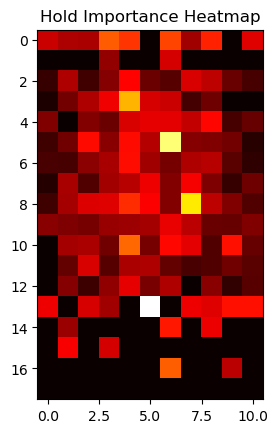

In [56]:
# Plot the feature importance
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))
importances = clf.feature_importances_

#vmap = np.zeros((11, 18))
#gradedf = df[df['grade'] == grade]
#for hold in unique_holds:
#    vmap[hold[0], hold[1]] = gradedf[f'{hold[0]}_{hold[1]}'].sum()
#plt.title(f'Hold Heatmap for V{grade}')
#plt.imshow(vmap.T[::-1], cmap='hot', interpolation='none')

importance_map = np.zeros((11, 18))
for i in range(len(unique_holds)):
    hold = unique_holds[i]
    importance_map[hold[0], hold[1]] = importances[i]
    
plt.title('Hold Importance Heatmap')
plt.imshow(importance_map.T[::-1], cmap='hot', interpolation='none')
